#[Your_name]

<h1 style="text-align: center;">Text Classification<h1>

Prepare libraries

In [1]:
# enter your password for the jupyter server http://localhost
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer
import re as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt            # library for visualization
import matplotlib
import matplotlib.patches as mpatches
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

In [2]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display


Download data

In [4]:
#!wget 'https://drive.google.com/uc?export=download&id=1cMSjxa3nA706LIZDEhwMpaVRMY2IX9P0' -O 'data.zip'

In [5]:
#!unzip data.zip

<h2 dir="rtl">مثال عن كيفية تنظيف حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [6]:
# your code here


In [7]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Load the data

## [1.1]

In [3]:
train_df = pd.read_csv('train.csv')
len(train_df)

52758

In [9]:
train_df.head(10)

,question,answer,label
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,الدم
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام-الخبيثة-والحميدة
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة-عامة
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض-الجهاز-التنفسي
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض-السكري
5,\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره م...,\n\nلا يمكن الإجابة على هذا السؤال بدون فحص يج...,أمراض-الدم
6,\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فج...,\n\nالفحص سليم من عدا أمرين:\n١. تضخم بسيط وحم...,الغدد-الصماء
7,\nعملت عن البواسير منذ شهر وعانيت خلال التبرز ...,\n\nلا يوحد مشكلة بالمشي. الاكثار من شرب السوا...,الجهاز-التنفسي
8,\nبالله عليكم امي اجريت عملية جراحية على فخذها...,\n\nانها السيروما سائل من الانسجة بعد الجراحة ...,ارتفاع-ضغط-الدم
9,\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة مضر...,\n\nلا ينصح بممارسة الرياضة بعد الأكل مباشرة\n...,أمراض_الغدد_الصماء


In [4]:
test_df = pd.read_csv('test.csv')
len(test_df)

17586

In [11]:
test_df.head(30)


,question,answer,label
0,\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...,\n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...,جراحة-عامة
1,\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...,\n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...,ارتفاع-ضغط-الدم
2,\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساعة\...,\n\nالنتيجة طبيعية\n2\n2023-06-03 08:16:44\n\n...,امراض_الجهاز_التنفسي
3,\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...,\n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...,الاورام-الخبيثة-والحميدة
4,\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...,\n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...,ارتفاع-ضغط-الدم
5,\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتورة...,\n\nظهور السكر بالبول متوقع في الحمل الطبيعي و...,امراض الغدد الصماء
6,\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال يخ...,\n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتق...,جراحة-عامة
7,\nكيف التوقف عن اخذ جرعات الثايروكسين ان كانت ...,\n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتن...,امراض-الغدد-الصماء
8,\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...,\n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...,جراحة-عامة
9,\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...,\n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...,جراحة-عامة


In [5]:
val_df = pd.read_csv('val.csv')
len(val_df)

17586

In [14]:
val_df.head(30)

,question,answer,label
0,\nما هى الاعراض الاولى لمرض السكر,\n\nأعراض مرض السكر كثيره أهمها العطش كثرة ادر...,جراحة عامة
1,\nكيف يمكن علاج الناسور العصعصي بدون جراحة,\n\nعلاج الناسور العصعصي يكون بالجراحة فقط\n0\...,جراحة_العظام
2,\nماهي الاثار الجانبية لستئصال الغده الدرقيه ع...,\n\nهناك تغييرات عديدة في العمليات الحيوية لمو...,ارتفاع_ضغط_الدم
3,\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حقت ...,\n\nيجب اتباع التعليمات الطبية و عدم وقف العلا...,امراض-الغدد-الصماء
4,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nمرحبا،\nبعد العملية، يمكن أن يحدث بعض الأع...,أمراض الجهاز التنفسي
5,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...,الاورام الخبيثة والحميدة
6,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...,جراحة_عامة
7,\nعملت اتستصال للفص الايمن من الدرقية. الحمدلل...,\n\nتورم الجرح بعد الجراحه امر طبيعى وقد يستمر...,الدم
8,\nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ال...,\n\nنعم يجب تقليل الجرعة وفعلها صحيح\n1\n2021-...,امراض-الغدد-الصماء
9,\nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي وا...,\n\nكما شرحت لك الخطورة تعتمد على وضع كل مريض ...,امراض-الدم


# حذف الأسطر المكررة

In [6]:
train_df=train_df.dropna().drop_duplicates().reset_index(drop=True)
test_df=test_df.dropna().drop_duplicates().reset_index(drop=True)
val_df=val_df.dropna().drop_duplicates().reset_index(drop=True)



In [16]:
print("train length after cleaning " ,len(train_df))
print("test length after cleaning " ,len(test_df))
print("val length after cleaning " ,len(val_df))

train length after cleaning  32598
test length after cleaning  11282
val length after cleaning  11341


In [16]:
train_df

,question,answer,label
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,الدم
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام-الخبيثة-والحميدة
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة-عامة
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض-الجهاز-التنفسي
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض-السكري
...,...,...,...
32593,\nالسلام عليكم\nانا عمري ٣٩ سنه عملت تحاليل طل...,\n\nلاعلاقة لنقص الفيتامين D أو B12 بالتوتر . ...,امراض-الغدد-الصماء
32594,\nدكتور انا برضع طبيعي وحسيت ان فى صدرى الايمن...,\n\nفي الغالب تكون هذه غدة حليبية. اذا كان الأ...,الاورام-الخبيثة-والحميدة
32595,\nهل يمكن ان يرتفع السكر الى 570 دون اعراض مع ...,\n\nليس بالضرورة وجود اعراض ويجب المتابعة عن ط...,مرض-السكري
32596,\nهل يمكن علاج سرطان الثدى المرحله الثانيه فى ...,\n\nطبعاً هناك بروتوكول يجب إتباعه. ولكنه بالن...,الاورام-الخبيثة-والحميدة


## [1.2]

In [7]:
train_df['label'].unique().tolist()

['الدم',
 'الاورام-الخبيثة-والحميدة',
 'جراحة-عامة',
 'أمراض-الجهاز-التنفسي',
 'مرض-السكري',
 'أمراض-الدم',
 'الغدد-الصماء',
 'الجهاز-التنفسي',
 'ارتفاع-ضغط-الدم',
 'أمراض_الغدد_الصماء',
 'جراحة-العظام',
 'السكري',
 'مرض_السكري',
 'الاورام الخبيثة والحميدة',
 'جراحة عامة',
 'الاورام_الخبيثة_والحميدة',
 'امراض الغدد الصماء',
 'امراض_الغدد_الصماء',
 'أمراض_الجهاز_التنفسي',
 'جراحة_عامة',
 'أمراض-الغدد-الصماء',
 'امراض الدم',
 'ارتفاع_ضغط_الدم',
 'امراض_الجهاز_التنفسي',
 'امراض_الدم',
 'امراض الجهاز التنفسي',
 'ارتفاع ضغط الدم',
 'امراض-الغدد-الصماء',
 'جراحة_العظام',
 'مرض السكري',
 'جراحة العظام',
 'امراض-الجهاز-التنفسي',
 'أمراض الجهاز التنفسي',
 'أمراض الغدد الصماء',
 'أمراض_الدم',
 'امراض-الدم',
 'أمراض الدم']

In [8]:
# Standardize names in the label column
specialty_mapping = {
    "امراض-الدم": "أمراض الدم",
    "أمراض_الدم": "أمراض الدم",
    "امراض_الدم": "أمراض الدم",
    "امراض الدم": "أمراض الدم",
    "أمراض-الدم": "أمراض الدم",
    "الدم": "أمراض الدم",


    "الاورام-الخبيثة-والحميدة": "الاورام الخبيثة والحميدة",
    "الاورام_الخبيثة_والحميدة": "الاورام الخبيثة والحميدة",


    "جراحة-عامة": "جراحة عامة",
    "جراحة_عامة": "جراحة عامة",

    "أمراض-الجهاز-التنفسي": "أمراض الجهاز التنفسي", 
    "الجهاز-التنفسي": "أمراض الجهاز التنفسي", 
    "أمراض_الجهاز_التنفسي": "أمراض الجهاز التنفسي", 
    "امراض_الجهاز_التنفسي": "أمراض الجهاز التنفسي",
    "امراض-الجهاز-التنفسي": "أمراض الجهاز التنفسي",
    "امراض الجهاز التنفسي": "أمراض الجهاز التنفسي",
     
    "مرض-السكري": "مرض السكري",
    "مرض_السكري": "مرض السكري",
    "السكري": "مرض السكري",
    

    "الغدد-الصماء": "أمراض الغدد الصماء",
    "أمراض_الغدد_الصماء": "أمراض الغدد الصماء",
    "امراض الغدد الصماء": "أمراض الغدد الصماء",
    "امراض_الغدد_الصماء": "أمراض الغدد الصماء",
    "أمراض-الغدد-الصماء": "أمراض الغدد الصماء",
    "امراض-الغدد-الصماء": "أمراض الغدد الصماء",

    "جراحة-العظام": "جراحة العظام",
    "جراحة_العظام": "جراحة العظام",
    "جراحة-العظام": "جراحة العظام",

    
    "ارتفاع_ضغط_الدم": "ارتفاع ضغط الدم",
    "ارتفاع-ضغط-الدم": "ارتفاع ضغط الدم",
   
}

train_df['label'] = train_df['label'].replace(specialty_mapping)
val_df['label'] = val_df['label'].replace(specialty_mapping)
test_df['label'] = test_df['label'].replace(specialty_mapping)




# Question [2]: Text Analysis

## [2.1] 


In [9]:
data=train_df['label'].value_counts().to_dict()
data

{'الاورام الخبيثة والحميدة': 6449,
 'جراحة عامة': 6307,
 'أمراض الغدد الصماء': 5752,
 'مرض السكري': 4268,
 'أمراض الجهاز التنفسي': 3676,
 'ارتفاع ضغط الدم': 2537,
 'جراحة العظام': 2211,
 'أمراض الدم': 1398}

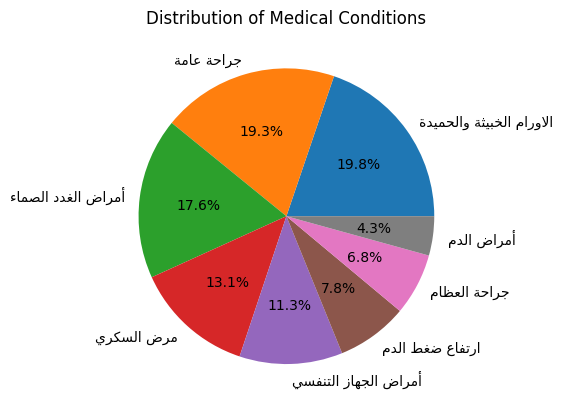

In [10]:
labels = list(data.keys())
values = data.values()

# Define a function to apply to each label
def preprocess_label(label):
    reshaped_text = arabic_reshaper.reshape(label)
    # Get the display version of the text
    display_text = get_display(reshaped_text)
    return display_text

# Apply the function to each label
preprocessed_labels = [preprocess_label(label) for label in labels]

# Create the pie chart with preprocessed labels
plt.pie(values, labels=preprocessed_labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Medical Conditions')

# Display the chart
plt.show()

## [2.2] 

In [11]:
train_df['q+a'] = train_df['question'] + ' ' + train_df['answer']
test_df['q+a'] = test_df['question'] + ' ' + test_df['answer']
val_df['q+a'] = val_df['question'] + ' ' + val_df['answer']

In [12]:
tokenizer = TweetTokenizer()
train_df['tokeized_q+a'] = train_df['q+a'].apply(tokenizer.tokenize)

In [13]:
train_df.head(5)

,question,answer,label,q+a,tokeized_q+a
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,أمراض الدم,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,"[ما, هي, مميزات, و, عيوب, الدواء, جلوكوفانس, 5..."
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام الخبيثة والحميدة,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,"[اليك, نتيجة, تحليل, هرمونات, الغدة, الدرقية, ..."
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة عامة,\nحلول منزلية لأعراض ارتفاع ضغط الدم \n\nيفضل...,"[حلول, منزلية, لأعراض, ارتفاع, ضغط, الدم, يفضل..."
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض الجهاز التنفسي,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,"[عملت, عملية, دوالي, الساقين, قسطرة, الليزر, م..."
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض السكري,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,"[ما, حقيقة, ان, تمرين, العضلة, النعلية, يخفض, ..."


In [14]:
unique_words = len(set(' '.join(train_df['q+a']).split()))
total_words = len(tokenizer.tokenize(' '.join(train_df['q+a'])))

print(f'Total words: {total_words}')
print(f'Unique words: {unique_words}')


Total words: 2615327
Unique words: 191442


## [2.3] 

In [17]:
class_text = " ".join(train_df['q+a'])
class_text = class_text.split()

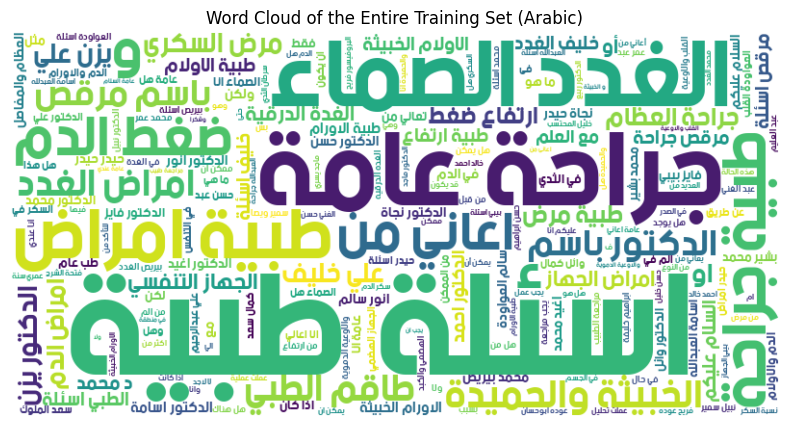

In [18]:

all_arabic_text = " ".join(class_text)

reshaped_text = arabic_reshaper.reshape(all_arabic_text)
bidi_text = get_display(reshaped_text)


wordcloud = WordCloud(font_path="be IN Black.ttf", width=800, height=400, background_color="white").generate(bidi_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of the Entire Training Set (Arabic)")
plt.show()

## [2.4] 

In [26]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
def tokenized_text_analyzer(text):
    # counting words in every text
    word_freq = {}
    for token in text:
        if token not in word_freq:
            word_freq[token] = 1
        else:
            word_freq[token] += 1

    # most 15 freq words
    descend_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    most_15_freq = descend_word_freq[:15]

    # 10 Least frequent words (hapaxes)
    ascending_word_freq=reversed(descend_word_freq)
    hapaxes = list(ascending_word_freq)[:10]

    # Bigram collocations
    bigram_freq = {}
    for i in range(len(text) - 1):
        bigram = (text[i], text[i+1])
        if bigram not in bigram_freq:
            bigram_freq[bigram] = 1
        else:
            bigram_freq[bigram] += 1

    descend_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
    most_freq_bigrams = descend_bigram_freq[:10]

    # Trigram collocations
    trigram_freq = {}
    for i in range(len(text) - 2):
        trigram = (text[i], text[i+1], text[i+2])
        if trigram not in trigram_freq:
            trigram_freq[trigram] = 1
        else:
            trigram_freq[trigram] += 1

    descend_trigram_freq = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)
    most_freq_trigrams = descend_trigram_freq[:10]


    # Initialize measures for bigrams 
    bigram_measures = BigramAssocMeasures()
    # Create BigramCollocationFinder
    bigram_finder = BigramCollocationFinder.from_words(token)
    # Get the top 10 bigram collocations based on Pointwise Mutual Information (PMI)
    bigram_collocations = bigram_finder.nbest(bigram_measures.raw_freq, 10)
    # Initialize measures for trigrams
    trigram_measures = TrigramAssocMeasures()
    # Create TrigramCollocationFinder
    trigram_finder = TrigramCollocationFinder.from_words(token)
    # Get the top 10 trigram collocations based on Pointwise Mutual Information (PMI)
    trigram_collocations = trigram_finder.nbest(trigram_measures.raw_freq, 10)

    return most_15_freq, hapaxes, most_freq_bigrams, most_freq_trigrams,bigram_collocations,trigram_collocations

# Example usage
tokenized_text = train_df['tokeized_answer'][123]
most_freq_words, hapaxes, most_freq_bigrams, most_freq_trigrams ,bigram_collocations,trigram_collocations= tokenized_text_analyzer(tokenized_text)

print("Most frequent words:")
for word, freq in most_freq_words:
    print(f"{word}: {freq}")

print("\nHapaxes:")
for hapax in hapaxes:
    print(hapax)

print("\nMost frequent bigrams:")
for bigram, freq in most_freq_bigrams:
    print(f"{bigram}: {freq}")

print("\nMost frequent trigrams:")
for trigram, freq in most_freq_trigrams:
    print(f"{trigram}: {freq}")

Most frequent words:
الدم: 18
ضغط: 17
على: 14
.: 10
من: 6
أو: 6
قياس: 6
في: 6
ارتفاع: 5
،: 5
الطبيب: 4
التي: 4
يجب: 4
:: 4
تجنب: 4

Hapaxes:
('253482', 1)
('-', 1)
('ضغطي-في-الصباح-وال-ترتفع-وتصل-بحد-اقصي-الي-عند-التوتر', 1)
('ارتفاع-ضغط-الدم', 1)
('اسئلة-طبية', 1)
('12', 1)
('14:49', 1)
('16', 1)
('2014-02-', 1)
('2', 1)

Most frequent bigrams:
('ضغط', 'الدم'): 17
('قياس', 'ضغط'): 6
('الدم', '.'): 5
('قبل', 'قياس'): 4
('ارتفاع', 'ضغط'): 3
('العمل', 'على'): 3
('الطبيب', 'المختص'): 3
('ارتفاع', 'قراءات'): 2
('قراءات', 'ضغط'): 2
('أن', 'تتم'): 2

Most frequent trigrams:
('قياس', 'ضغط', 'الدم'): 6
('ضغط', 'الدم', '.'): 5
('قبل', 'قياس', 'ضغط'): 4
('ارتفاع', 'ضغط', 'الدم'): 3
('ارتفاع', 'قراءات', 'ضغط'): 2
('قراءات', 'ضغط', 'الدم'): 2
('تحت', 'إشراف', 'الطبيب'): 2
('لمدة', '30', 'دقيقة'): 2
('30', 'دقيقة', 'قبل'): 2
('دقيقة', 'قبل', 'قياس'): 2


In [27]:
trigram_collocations

[('ا', 'ل', 'ط'), ('ط', 'ب', 'ي'), ('ل', 'ط', 'ب')]

In [28]:
bigram_collocations

[('ا', 'ل'), ('ب', 'ي'), ('ط', 'ب'), ('ل', 'ط')]

## [2.5] 

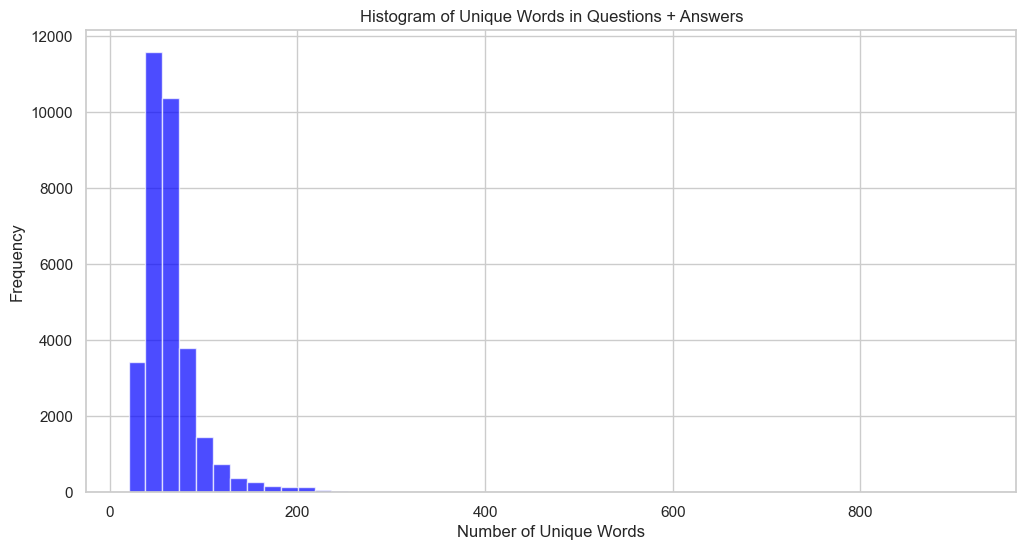

In [29]:
temp = temp = pd.DataFrame()

# Assuming you have already defined 'train_df' and 'tokenizer'

# Calculate unique words and total words for each q+a
temp['unique_words'] = train_df['q+a'].apply(lambda x: len(set(tokenizer.tokenize(x))))
temp['label'] = train_df['label']

# Plot histogram for all q+a
plt.figure(figsize=(12, 6))
plt.hist(temp['unique_words'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Unique Words in Questions + Answers')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()




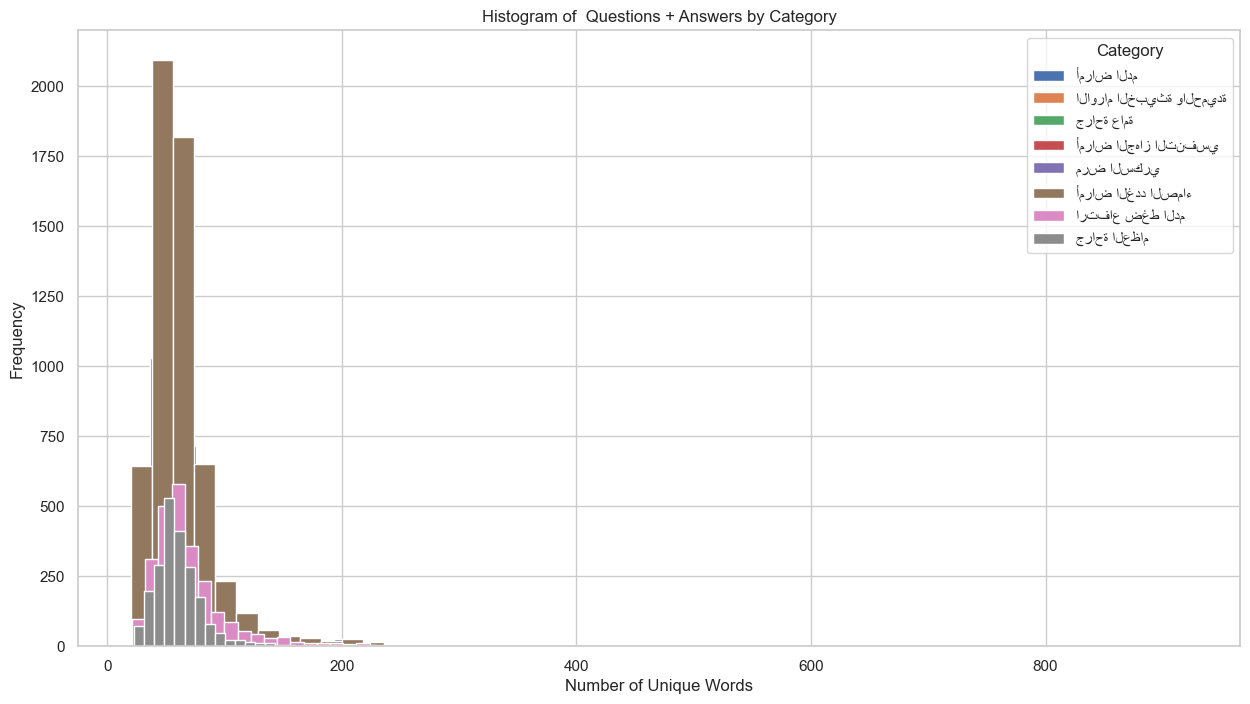

In [32]:
# Plot histogram for each category separately
categories = temp['label'].unique()
plt.figure(figsize=(15, 8))

for category in categories:
    subset = temp[temp['label'] == category]
    plt.hist(subset['unique_words'], bins=50, alpha=1, label=str(category))

plt.title('Histogram of  Questions + Answers by Category')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.legend(title='Category')
plt.show()

In [21]:
train_df.head(5)

,question,answer,label,q+a,tokeized_q+a
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,أمراض الدم,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,"[ما, هي, مميزات, و, عيوب, الدواء, جلوكوفانس, 5..."
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام الخبيثة والحميدة,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,"[اليك, نتيجة, تحليل, هرمونات, الغدة, الدرقية, ..."
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة عامة,\nحلول منزلية لأعراض ارتفاع ضغط الدم \n\nيفضل...,"[حلول, منزلية, لأعراض, ارتفاع, ضغط, الدم, يفضل..."
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض الجهاز التنفسي,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,"[عملت, عملية, دوالي, الساقين, قسطرة, الليزر, م..."
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض السكري,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,"[ما, حقيقة, ان, تمرين, العضلة, النعلية, يخفض, ..."


# Question [3]: Text Cleaning and Normalization

## [3.1] 


In [33]:
def remove_urls(text):
    
    url_pattern = r'https?://\S+|www\.\S+|altibbi\.com/\S+|/اسئلة-طبية/\S+'

    text_without_urls = re.sub(url_pattern, '', text)

    return text_without_urls

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = remove_urls(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")



Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف









الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-

## [3.2 + 3.3] 

In [37]:
def remove_doctor_names_and_remove_specialty(text):
    text_without_names = re.sub(r'(الدكتور|دكتور|دكتورة|الدكتورة|الدكتوره|دكتوره|د\.)\s+(\w+)(\s+\w+)*', "", text)
    return text_without_names
# Test results
for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = remove_doctor_names_and_remove_specialty(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51










/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكت

## [3.4] 

In [42]:
def remove_repeated_letters(text):
    # Delete duplicate characters, allowing only up to two consecutive repetitions
    # Note: Arabic words can only allow two letters to be repeated
    text_without_repeated_letters = re.sub(r'(.)\1{2,}', r'\1', text)
    return text_without_repeated_letters

#Test results
for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = remove_repeated_letters(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")
    


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب اس

## [3.5]

### [3.5.1] 

In [43]:
import re

def arabic_to_indian_numbers(text):
    arabic_numbers = {'١': '1', '٢': '2', '٣': '3', '٤': '4', '٥': '5',
                      '٦': '6', '٧': '7', '٨': '8', '٩': '9', '٠': '0'}
    for indian, arabic in arabic_numbers.items():
        text = re.sub(indian, arabic, text)
    return text

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = arabic_to_indian_numbers(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب اس

### [3.5.2] 

In [44]:
def replace_numbers_with_symbol(text):
    # Unify the writing of all numbers with a specified symbol
    # Regardless of their symbols
    symbol='*'
    text = re.sub(r'\d+', symbol, text)
    return text
for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = replace_numbers_with_symbol(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس * * و ايضا الأنسولين مكس تارد *  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
*
*-*-* *:*:*


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-*

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو س

### [3.5.3] 

In [45]:
def delete_all_numbers(text):
    # Delete all numbers (regardless of their symbols) from the text
    text_without_numbers = re.sub(r'\d+', '', text)
    return text_without_numbers

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = delete_all_numbers(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس   و ايضا الأنسولين مكس تارد   

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له

-- ::


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة


### [3.5.4]

In [46]:
def delete_date_time(text):
    
    text_without_date_time = re.sub(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', '', text)
    return text_without_date_time



for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = delete_date_time(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1



الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطا

## [3.6] 

### [3.6.1] 

In [47]:
def delete_marks_punct(text):
    # Delete all punctuation marks (Arabic and Latin)
    text_without_punctuation = re.sub(r'[^\w\s\d]', '', text)
    return text_without_punctuation


for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = delete_marks_punct(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
20150104 200851


الدكتور يزن علي خليف







اسئلةطبيةمرضالسكريماهيمميزاتوعيوبالدواءجلوكوفانسوايضاالانسولين351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطا

### [3.6.2] 

In [48]:
def keep_arabic_numbers_punctuation(text):
    # Keep Arabic characters, numbers, and specific punctuation marks
    arabic_text = re.sub(r'[^\u0600-\u06FF\d./\-،\s]', '', text)
    return arabic_text

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = keep_arabic_numbers_punctuation(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")



Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 200851


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئ

## [3.7] 

In [49]:
def delete_stop_words(text):
    # List of common Arabic stop words
    

    # List of repetitive phrases to delete
    repetitive_phrases = ["إقرأ المزيد", "أرجو الرد","... الخ", "السلام عليكم"]  # Add more phrases as needed
    stop_words_set = set(stopwords.words("arabic") +repetitive_phrases)
    # Combine stop words and repetitive phrases into a single pattern
    stop_pattern = r'\b(?:' + '|'.join(stop_words_set) + r')\b'

    # Delete stop words and repetitive phrases from the text
    text_without_stop_words = re.sub(stop_pattern, '', text)
    return text_without_stop_words



for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = delete_stop_words(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

  مميزات  عيوب الدواء جلوكوفانس 500 5  ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد  حالة المريض فما  يناسب احدهم   يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض 
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/--مميزات--عيوب-الدواء-جلوكوفانس--ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان ال

## [3.8] 

In [50]:
def root_arabic_words(text):
    # Rooting Arabic words using ISRIStemmer with re
    stemmer = ISRIStemmer()
    rooted_text = ' '.join([stemmer.stem(word) for word in re.findall(r'\b\w+\b', text)])
    return rooted_text

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = root_arabic_words(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:
ما هي ميز و عيب دوء جلوكوفانس 500 5 و ايض سول مكس ترد 30 لكل علج ايجابيته وسلبياته والتي عمد على حلة ريض فما قد نسب احد قد لا نسب اخر وهذا حدد طبب خلل رجع ريض له 1 2015 01 04 20 08 51 دكتور يزن علي خلف سئل طبة مرض سكر ما هي ميز و عيب دوء جلوكوفانس و ايض سول 351157 دكتور يزن علي خلف غدد صمء

Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-ا

## [3.9] 

### [3.9.1] 

In [51]:
def tooheed_Alhamzat(text):
    # tooheed_Alhamzat (ء، ؤ، ئ)
    text_hamzat = re.sub(r'[ءؤئ]', 'ء', text)
    return text_hamzat

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = tooheed_Alhamzat(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسءلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب اس

### [3.9.2] 

In [52]:
def toheed_alef(text):
    # toheed_alef (أ، آ، إ)
    text_alef = re.sub(r'[أآإ]', 'أ', text)
    return text_alef

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = toheed_alef(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب اس

### [3.9.3] 

In [53]:
def delete_tatweel(text):
    # Delete tatweel (التطــــــــــــــــــــــــويل')
    text_without_tatweel = re.sub(r'ـ', '', text)
    return text_without_tatweel

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = delete_tatweel(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب اس

### [3.9.4] 

In [54]:
def delete_tashkeel(text):
    # Delete tashkeel (تشكيل)
    text_without_tashkeel = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)
    return text_without_tashkeel

for i in range(5):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = delete_tashkeel(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Processed Text 1:

ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 




Original Text 2:

اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب اس

## [3.10] 

In [55]:
def delete_alotof_spaces(text):
    # Delete duplicate spaces between words and replace them with a single space
    text_without_alotof_spaces = re.sub(r'\s+', ' ', text)
    return text_without_alotof_spaces




for i in range(5,15):
    
    original_text = train_df.iloc[i]['q+a']
    processed_text = delete_alotof_spaces(original_text)

    print(f"\nOriginal Text {i + 1}:\n{original_text}\n")
    print(f"Processed Text {i + 1}:\n{processed_text}\n{'='*50}")


Original Text 6:

السلام عليكم انا شاب 25 سنه وظهرلي زي كوره من فتحت الشرج وهي تولمني الان ارجو حل فوري لاني مش مستحمل الالم وكمان عامل عمليه حاليا في كتفي مركب وديما قاعد فعاوز حل سريع وشكرا  

لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795

الاستشاري محمد عمر عبد العليم 


جراحة عامة 




Processed Text 6:
 السلام عليكم انا شاب 25 سنه وظهرلي زي كوره من فتحت الشرج وهي تولمني الان ارجو حل فوري لاني مش مستحمل الالم وكمان عامل عمليه حاليا في كتفي مركب وديما قاعد فعاوز حل سريع وشكرا لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص 0 2018-08-24 23:19:49 الاستشاري محمد عمر عبد العليم /اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795 الاستشاري محمد عمر عبد العليم جراحة عامة 

Original Text 7:

ورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فجاة من شهر زاد حجمها فجاه ومعها عوار حول الورمه قمت بعمل تحليل غدة وهي سليمة ؟

## Extra [3.11]

# Question [4]: Prepare Training Data

## [4.1] 


In [56]:
rows_before_cleaning = len(train_df)

In [57]:
class Prepare_Data:
    def __init__(self, dataframe, column, functions):
        self.dataframe = dataframe
        self.column = column
        self.functions = functions

    def apply_functions_on_first_5rows(self):
        subset=self.dataframe[self.column].head(5)
        for function in self.functions:
            subset=subset.apply(function)
        #self.dataframe[f'cleaned_{self.column}']=subset
        return subset

    def apply_functions(self):
        subset=self.dataframe[self.column]
        for function in self.functions:
            subset=subset.apply(function)
        #self.dataframe[f'cleaned_{self.column}']=subset
        return subset

# Rest of the code remains the same as in your previous example

In [58]:
functions=[remove_urls, remove_doctor_names_and_remove_specialty ,remove_repeated_letters,arabic_to_indian_numbers ,replace_numbers_with_symbol, delete_all_numbers, delete_date_time, delete_marks_punct, keep_arabic_numbers_punctuation, delete_stop_words,
root_arabic_words, tooheed_Alhamzat, toheed_alef, delete_tatweel, delete_tashkeel, delete_alotof_spaces,]


Preparing_resulte = Prepare_Data(train_df,'q+a',functions)
resulte= Preparing_resulte.apply_functions_on_first_5rows()
print(resulte[:5])

0    ميز عيب دوء جلوكوفانس ايض سول مكس ترد لكل علج ...
1    الك نتج حلل هرمو غدة درق علم بنه تم أصل غدة كث...
2    حلل زلي أعراض رفع ضغط لدم فضل عدم غنء علج دءي ...
3    عمل عمل دلي ساق قسطر يزر شهر عند الم سفل ساق ا...
4    حقق ان تمر عضل نعل خفض سكر لدم قصد دلك عضل فهذ...
Name: q+a, dtype: object


## [4.2] 

In [59]:
all_resulte= Preparing_resulte.apply_functions()
train_df['cleaned_q+a']=all_resulte

In [60]:
train_df

,question,answer,label,q+a,tokeized_q+a,cleaned_q+a
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,أمراض الدم,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,"[ما, هي, مميزات, و, عيوب, الدواء, جلوكوفانس, 5...",ميز عيب دوء جلوكوفانس ايض سول مكس ترد لكل علج ...
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام الخبيثة والحميدة,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,"[اليك, نتيجة, تحليل, هرمونات, الغدة, الدرقية, ...",الك نتج حلل هرمو غدة درق علم بنه تم أصل غدة كث...
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة عامة,\nحلول منزلية لأعراض ارتفاع ضغط الدم \n\nيفضل...,"[حلول, منزلية, لأعراض, ارتفاع, ضغط, الدم, يفضل...",حلل زلي أعراض رفع ضغط لدم فضل عدم غنء علج دءي ...
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض الجهاز التنفسي,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,"[عملت, عملية, دوالي, الساقين, قسطرة, الليزر, م...",عمل عمل دلي ساق قسطر يزر شهر عند الم سفل ساق ا...
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض السكري,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,"[ما, حقيقة, ان, تمرين, العضلة, النعلية, يخفض, ...",حقق ان تمر عضل نعل خفض سكر لدم قصد دلك عضل فهذ...
...,...,...,...,...,...,...
32593,\nالسلام عليكم\nانا عمري ٣٩ سنه عملت تحاليل طل...,\n\nلاعلاقة لنقص الفيتامين D أو B12 بالتوتر . ...,أمراض الغدد الصماء,\nالسلام عليكم\nانا عمري ٣٩ سنه عملت تحاليل طل...,"[السلام, عليكم, انا, عمري, ٣٩, سنه, عملت, تحال...",انا عمر سنه عمل حلل طلع نسب فتم فتم نسب اعا صد...
32594,\nدكتور انا برضع طبيعي وحسيت ان فى صدرى الايمن...,\n\nفي الغالب تكون هذه غدة حليبية. اذا كان الأ...,الاورام الخبيثة والحميدة,\nدكتور انا برضع طبيعي وحسيت ان فى صدرى الايمن...,"[دكتور, انا, برضع, طبيعي, وحسيت, ان, فى, صدرى,...",اذا الم خفف فيم عمل كمد دفء اذا الم شدد يجب رج...
32595,\nهل يمكن ان يرتفع السكر الى 570 دون اعراض مع ...,\n\nليس بالضرورة وجود اعراض ويجب المتابعة عن ط...,مرض السكري,\nهل يمكن ان يرتفع السكر الى 570 دون اعراض مع ...,"[هل, يمكن, ان, يرتفع, السكر, الى, 570, دون, اع...",يمكن ان رفع سكر الى عرض علم انه تكن لدي عرض سك...
32596,\nهل يمكن علاج سرطان الثدى المرحله الثانيه فى ...,\n\nطبعاً هناك بروتوكول يجب إتباعه. ولكنه بالن...,الاورام الخبيثة والحميدة,\nهل يمكن علاج سرطان الثدى المرحله الثانيه فى ...,"[هل, يمكن, علاج, سرطان, الثدى, المرحله, الثاني...",يمكن علج سرط ثدى رحل ثني فى احد ممر عقد ليمفاو...


In [62]:
unique_words_before = len(set(' '.join(train_df['q+a']).split()))
total_words_before = len(tokenizer.tokenize(' '.join(train_df['q+a'])))


unique_words_after = len(set(' '.join(train_df['cleaned_q+a']).split()))
total_words_after = len(tokenizer.tokenize(' '.join(train_df['cleaned_q+a'])))


print(f"Total words before cleaning: {total_words_before}")
print(f"Unique words before cleaning: {unique_words_before}")

print(f"\nTotal words after cleaning: {total_words_after}")
print(f"Unique words after cleaning: {unique_words_after}")

Total words before cleaning: 2615327
Unique words before cleaning: 191442

Total words after cleaning: 1317263
Unique words after cleaning: 23936


## [4.3] 

In [63]:


train_df = train_df[train_df['cleaned_q+a'].apply(lambda x: len(str(x)) > 5)]


rows_after_cleaning = len(train_df)
deleted_rows_count = rows_before_cleaning - rows_after_cleaning



print(f"Number of rows before cleaning: {rows_before_cleaning}")
print(f"Number of rows after cleaning: {rows_after_cleaning}")
print(f"Number of deleted rows: {deleted_rows_count}")

Number of rows before cleaning: 32598
Number of rows after cleaning: 32492
Number of deleted rows: 106


# Question [5]: Baseline

The Comparison Dictionary example

In [72]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

## [5.1]

In [119]:
x_train=train_df['q+a'].tolist()
y_train=train_df['label'].tolist()

x_test=test_df['q+a'].tolist()
y_test=test_df['label'].tolist()

x_val=val_df['q+a'].tolist()
y_val=val_df['label'].tolist()

In [64]:
"""from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_val_encoded=label_encoder.fit_transform(y_val)"""

'from sklearn.preprocessing import LabelEncoder\n\n\nlabel_encoder = LabelEncoder()\ny_train_encoded = label_encoder.fit_transform(y_train)\ny_test_encoded = label_encoder.fit_transform(y_test)\ny_val_encoded=label_encoder.fit_transform(y_val)'

## [5.2]

In [66]:
def cv(data):
    count_vectorizer = CountVectorizer(binary=True)

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer




In [67]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score


def multinomial_Logistic_Regression(X_train, y_train, X_test, y_test):
    
    X_train_cv, count_vectorizer = cv(X_train)
    x_test_cv = count_vectorizer.transform(X_test)

    clf = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 40)
    
    clf.fit(X_train_cv, y_train)

    y_predict = clf.predict(x_test_cv)
    print('y_pred shape:', y_predict.shape)
    accuracy = accuracy_score(y_test, y_predict)
    balance_accuracy = balanced_accuracy_score(y_test, y_predict)

    return accuracy , balance_accuracy

In [67]:
#accuracy ,balance_accuracy= multinomial_Logistic_Regression(x_train, y_train, x_test, y_test)

In [68]:
"""comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("non")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)"""


'comparison_table[\'question_step_number\'].append("3.5")\ncomparison_table[\'model_name\'].append(\'logistic_regression\')\ncomparison_table[\'features\'].append(\'bag of words\')\ncomparison_table[\'model_parameters\'].append(\'default\')\ncomparison_table[\'preprocessing_methods\'].append("non")\ncomparison_table[\'accuracy\'].append(accuracy)\ncomparison_table[\'balance_accuracy\'].append(balance_accuracy)'

In [92]:
comparison_table

{'question_step_number': ['3.5'],
 'model_name': ['logistic_regression'],
 'features': ['bag of words'],
 'model_parameters': ['default'],
 'preprocessing_methods': ['non'],
 'accuracy': [0.6484665839390179],
 'balance_accuracy': [0.6307418501765947]}

## [5.3]

In [68]:
def one_clean_at_the_time(x_train, y_train, x_test, y_test,preprocessing_methods):
    accuracy ,balance_accuracy= multinomial_Logistic_Regression(x_train, y_train, x_test, y_test)
    comparison_table['question_step_number'].append("3.5")
    comparison_table['model_name'].append('logistic_regression')
    comparison_table['features'].append('bag of words')
    comparison_table['model_parameters'].append('default')
    comparison_table['preprocessing_methods'].append(preprocessing_methods)
    comparison_table['accuracy'].append(accuracy)
    comparison_table['balance_accuracy'].append(balance_accuracy)

In [70]:
functions=[ remove_doctor_names_and_remove_specialty ,remove_repeated_letters, delete_all_numbers, delete_marks_punct, delete_stop_words,
root_arabic_words, tooheed_Alhamzat, toheed_alef, delete_tatweel, delete_tashkeel, delete_alotof_spaces,]



In [73]:
for function in functions:
    Prepare_Training_Data = Prepare_Data(train_df,'q+a',[function])
    x_train_cleaned_once= Prepare_Training_Data.apply_functions()
    
    Prepare_Test_Data = Prepare_Data(test_df,'q+a',[function])
    x_test_cleaned_once= Prepare_Test_Data.apply_functions()

    one_clean_at_the_time(x_train_cleaned_once, y_train, x_test_cleaned_once, y_test,function)



c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


y_pred shape: (11282,)


c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


y_pred shape: (11282,)


c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


y_pred shape: (11282,)


c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


y_pred shape: (11282,)


c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


y_pred shape: (11282,)


c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


y_pred shape: (11282,)


KeyboardInterrupt: 

In [99]:
"""import csv

output_file = 'comparison_table.csv'

# Extract the keys from the dictionary as column names
fieldnames = list(comparison_table.keys())

# Write the dictionary to the CSV file
with open(output_file, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(fieldnames)  # Write the column names
    rows = zip(*comparison_table.values())  # Zip the values together
    writer.writerows(rows)  # Write the rows"""

In [85]:
import csv

def csv_to_dict(file_path, data_dict):
    with open(file_path, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data_dict['question_step_number'].append(float(row['question_step_number']))
            data_dict['model_name'].append(row['model_name'])
            data_dict['features'].append(row['features'])
            data_dict['model_parameters'].append(row['model_parameters'])
            data_dict['preprocessing_methods'].append(row['preprocessing_methods'])
            data_dict['accuracy'].append(float(row['accuracy']))
            data_dict['balance_accuracy'].append(float(row['balance_accuracy']))

# Example usage:
file_path = 'comparison_table.csv'
comparison_table = {
    'question_step_number': [],
    'model_name': [],
    'features': [],
    'model_parameters': [],
    'preprocessing_methods': [],
    'accuracy': [],
    'balance_accuracy': []
}

csv_to_dict(file_path, comparison_table)
print(comparison_table)

{'question_step_number': [3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5], 'model_name': ['logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression', 'logistic_regression'], 'features': ['bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words', 'bag of words'], 'model_parameters': ['default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default'

In [86]:
comparison_table

{'question_step_number': [3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5],
 'model_name': ['logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression',
  'logistic_regression'],
 'features': ['bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words',
  'bag of words'],
 'model_parameters': ['default',
  'default',
  'default',
  'default',
  'default',
  'default',

In [87]:
comparison_table_dataframe = pd.DataFrame(comparison_table)

In [88]:
comparison_table_dataframe

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,3.5,logistic_regression,bag of words,default,non,0.648467,0.630742
1,3.5,logistic_regression,bag of words,default,remove_urls,0.582787,0.563094
2,3.5,logistic_regression,bag of words,default,remove_doctor_names_and_remove_specialty,0.657419,0.641764
3,3.5,logistic_regression,bag of words,default,remove_repeated_letters,0.652898,0.634507
4,3.5,logistic_regression,bag of words,default,arabic_to_indian_numbers,0.651835,0.634684
5,3.5,logistic_regression,bag of words,default,replace_numbers_with_symbol,0.651658,0.634175
6,3.5,logistic_regression,bag of words,default,delete_all_numbers,0.651037,0.632508
7,3.5,logistic_regression,bag of words,default,delete_date_time,0.652101,0.634445
8,3.5,logistic_regression,bag of words,default,delete_marks_punct,0.598653,0.576922
9,3.5,logistic_regression,bag of words,default,keep_arabic_numbers_punctuation,0.659103,0.643616


In [ ]:
"""output_file = 'comparison_table1.csv'

# Save the DataFrame to a CSV file
comparison_table.to_csv(output_file, index=False)"""

## [5.4]

In [74]:
Preprocessing_methods_with_best_balanced_accuracy=[delete_alotof_spaces,remove_doctor_names_and_remove_specialty, remove_repeated_letters, delete_date_time , arabic_to_indian_numbers, keep_arabic_numbers_punctuation, delete_stop_words, toheed_alef, delete_tatweel, delete_tashkeel]
Prepare_Training_Data = Prepare_Data(train_df,'q+a',Preprocessing_methods_with_best_balanced_accuracy)
x_train_cleaned_best= Prepare_Training_Data.apply_functions()

Prepare_Test_Data = Prepare_Data(test_df,'q+a',Preprocessing_methods_with_best_balanced_accuracy)
x_test_cleaned_best= Prepare_Test_Data.apply_functions()

In [91]:
one_clean_at_the_time(x_train_cleaned_best, y_train, x_test_cleaned_best, y_test,"Preprocessing_methods_with_best_balanced_accuracy")

y_pred shape: (11282,)


c:\Users\redan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
comparison_table_dataframe = pd.DataFrame(comparison_table)

In [94]:
comparison_table_dataframe 

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,3.5,logistic_regression,bag of words,default,non,0.648467,0.630742
1,3.5,logistic_regression,bag of words,default,remove_urls,0.582787,0.563094
2,3.5,logistic_regression,bag of words,default,remove_doctor_names_and_remove_specialty,0.657419,0.641764
3,3.5,logistic_regression,bag of words,default,remove_repeated_letters,0.652898,0.634507
4,3.5,logistic_regression,bag of words,default,arabic_to_indian_numbers,0.651835,0.634684
5,3.5,logistic_regression,bag of words,default,replace_numbers_with_symbol,0.651658,0.634175
6,3.5,logistic_regression,bag of words,default,delete_all_numbers,0.651037,0.632508
7,3.5,logistic_regression,bag of words,default,delete_date_time,0.652101,0.634445
8,3.5,logistic_regression,bag of words,default,delete_marks_punct,0.598653,0.576922
9,3.5,logistic_regression,bag of words,default,keep_arabic_numbers_punctuation,0.659103,0.643616


## [5.5]

In [105]:
Prepare_Test_Data = Prepare_Data(val_df,'q+a',Preprocessing_methods_with_best_balanced_accuracy)
x_val_cleaned_best= Prepare_Test_Data.apply_functions()

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data and labels stored in variables X and y

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_cleaned_best)

# Transform the test data using the fitted vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test_cleaned_best)

# Create a logistic regression model
logreg_model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 40)

# Train the model on the TF-IDF transformed data
logreg_model.fit(x_train_tfidf, y_train)

# Predict the labels for the test data
y_pred = logreg_model.predict(x_test_tfidf)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
balance_accuracy = balanced_accuracy_score(y_test, y_pred) 
print("Best Model Balance Accuracy:", balance_accuracy)
print("Accuracy:", accuracy)

Best Model Balance Accuracy: 0.6779871536350152
Accuracy: 0.6975713525970573


c:\Users\redan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
comparison_table['question_step_number'].append("5.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('tf_idf')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("Preprocessing_methods_with_best_balanced_accuracy")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy)

In [101]:
comparison_table_dataframe = pd.DataFrame(comparison_table)

In [102]:
comparison_table_dataframe

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,3.5,logistic_regression,bag of words,default,non,0.648467,0.630742
1,3.5,logistic_regression,bag of words,default,remove_urls,0.582787,0.563094
2,3.5,logistic_regression,bag of words,default,remove_doctor_names_and_remove_specialty,0.657419,0.641764
3,3.5,logistic_regression,bag of words,default,remove_repeated_letters,0.652898,0.634507
4,3.5,logistic_regression,bag of words,default,arabic_to_indian_numbers,0.651835,0.634684
5,3.5,logistic_regression,bag of words,default,replace_numbers_with_symbol,0.651658,0.634175
6,3.5,logistic_regression,bag of words,default,delete_all_numbers,0.651037,0.632508
7,3.5,logistic_regression,bag of words,default,delete_date_time,0.652101,0.634445
8,3.5,logistic_regression,bag of words,default,delete_marks_punct,0.598653,0.576922
9,3.5,logistic_regression,bag of words,default,keep_arabic_numbers_punctuation,0.659103,0.643616


## [5.6]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline

x_val_tfidf = tfidf_vectorizer.transform(x_val_cleaned_best)  # Transform the validation data using the fitted vectorizer

# Create a pipeline with TF-IDF vectorizer and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

# Define the parameter grid for TF-IDF vectorizer and logistic regression
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True, False],
    'logreg__C': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train_cleaned_best, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_



In [108]:
# Use the best model to predict on the validation data
y_pred_val = best_model.predict(x_val_cleaned_best)

# Calculate the accuracy of the best model on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)


# Calculate the balanced accuracy on the validation data
balanced_accuracy_val = balanced_accuracy_score(y_val, y_pred_val)
print("Balanced Accuracy on Validation Data:", balanced_accuracy_val)
print("Best Model Accuracy on Validation Data:", accuracy_val)
print("Best Parameters:", best_params)

Balanced Accuracy on Validation Data: 0.7046530156719228
Best Model Accuracy on Validation Data: 0.7108720571378185
Best Parameters: {'logreg__C': 1, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': False}


In [109]:
comparison_table['question_step_number'].append("5.6")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('tf_idf')
comparison_table['model_parameters'].append("{'logreg__C': 1, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': False}")
comparison_table['preprocessing_methods'].append("Preprocessing_methods_with_best_balanced_accuracy")
comparison_table['accuracy'].append(accuracy_val)
comparison_table['balance_accuracy'].append(balanced_accuracy_val)

In [111]:
comparison_table_dataframe = pd.DataFrame(comparison_table)

In [112]:
comparison_table_dataframe

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,3.5,logistic_regression,bag of words,default,non,0.648467,0.630742
1,3.5,logistic_regression,bag of words,default,remove_urls,0.582787,0.563094
2,3.5,logistic_regression,bag of words,default,remove_doctor_names_and_remove_specialty,0.657419,0.641764
3,3.5,logistic_regression,bag of words,default,remove_repeated_letters,0.652898,0.634507
4,3.5,logistic_regression,bag of words,default,arabic_to_indian_numbers,0.651835,0.634684
5,3.5,logistic_regression,bag of words,default,replace_numbers_with_symbol,0.651658,0.634175
6,3.5,logistic_regression,bag of words,default,delete_all_numbers,0.651037,0.632508
7,3.5,logistic_regression,bag of words,default,delete_date_time,0.652101,0.634445
8,3.5,logistic_regression,bag of words,default,delete_marks_punct,0.598653,0.576922
9,3.5,logistic_regression,bag of words,default,keep_arabic_numbers_punctuation,0.659103,0.643616


# Question [6]: Semantic Representation

## [6.1]

In [75]:
count_vectorizer = CountVectorizer()

def get_raw_frequency(word, bag_of_words):
    index = count_vectorizer.vocabulary_[word]
    return bag_of_words[:, index].toarray()

X_train_cv = count_vectorizer.fit_transform(x_train_cleaned_best)
word = 'السكر'
raw_frequency = get_raw_frequency(word, X_train_cv)
print(f"Raw frequency of '{word}': {raw_frequency}")

Raw frequency of 'السكر': [[0]
 [0]
 [0]
 ...
 [3]
 [0]
 [0]]


## [6.2]

In [76]:

def context_words(target_word, texts):
    context_words = set()

    # Iterate through each text
    for text in texts:
        words = text.split()

        # Iterate through each word in the text
        for i, word in enumerate(words):
            # Check if the current word is the target word
            if word == target_word:
                # Add surrounding words to the context_words set
                context_words.update(words[max(0, i-5):i] + words[i+1:min(i+6, len(words))])

    return context_words

# Example word
word_to_check = 'السكر'


context_words_train = context_words(word_to_check, x_train_cleaned_best)


print(f"Context words for '{word_to_check}' in the training data:")
print(context_words_train)

Context words for 'السكر' in the training data:
{'بعدصيام', 'لاريكا', 'ايضا', 'معن', 'باعتدال', 'بالعصبيه؟', 'وعموما', 'لامشكلة', 'ممارسة', 'للعلاجات', 'اعان', 'وارد', 'اكتئاب', 'نشاطك', 'دفتر', 'للاكل', 'بعود', '/اسئلة-طبية/مرض-السكري/انا--احس-بالعطش-ابي--لديه-السكر--امي-اعاني--388693', 'الخصوبه', 'معد', 'جلمبريد', 'مغ/دسل', 'بدء', 'بأمان', 'لاعلاقة', 'ارفع', 'لدغة', 'لتحكم', 'ملكات', 'تستعملها', 'بالحرقة', 'وادوية', 'بالنعاس', 'ولما', '1', 'جليم', 'فيسحب', 'للأدوية', 'فالطعام', 'القيت', 'بالجروح', 'افضل', '7.7', 'ثأثير', 'الريء', 'تنذر', 'جي..', 'لنقص', 'الاخر', 'قبلها', 'النطام', '/اسئلة-طبية/جراحة-/مريض-سكري-واجرى-عملية-بتر-لاصبع-قدمه-ياخذ-دواء-1663208', '5.8', 'طلعت', 'الافطار،', 'ارشدون', '..الخ', 'نعالج', 'ادويتك', '475', 'للمساعدة', 'جدت', 'اولى', 'الطوارئ', 'ضربات', 'حامل', 'مشكلتك', 'تدور', 'ويساعد', 'حولي', 'انتبه', 'الرعاية', 'السى', 'أكون', 'محمد', 'متخوف', 'مجموع', 'الأولسكر', 'الطبعية', 'أشهرها', 'سيساهم', 'يدي', 'لرجل', 'قس', 'طرق،', 'تشمل', 'وحين', 'امتنع', '/اسئلة-طبي

## [6.3]

In [84]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def train_skipgram_model(texts, embedding_dim, context_size, epochs, batch_size):
    # Tokenize the text and convert it to sequences
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(texts)
    total_words = len(tokenizer.word_index) + 1
    
    input_sequences = []
    for line in texts:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    
    # Pad sequences
    max_sequence_length = max([len(seq) for seq in input_sequences])
    padded_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
    
    x_train = padded_sequences[:, :-1]
    y_train = padded_sequences[:, -1]
    
    # Build the model
    model = Sequential()
    model.add(Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=max_sequence_length-1))
    model.add(Flatten())
    model.add(Dense(total_words, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    
    embedding_matrix = model.layers[0].get_weights()[0]
    return embedding_matrix, tokenizer

# Example usage
texts = x_train_cleaned_best[:100]
vocabulary_size = len(set(' '.join(x_train_cleaned_best[:100]).split())) 
embedding_dim = 22
context_size = 2  
epochs = 10
batch_size = 64

embedding_matrix, tokenizer = train_skipgram_model(texts, embedding_dim, context_size, epochs, batch_size)

# Example: Access the embedding vector for a specific word
word_to_check = 'مرض'
word_index = tokenizer.word_index[word_to_check]
word_vector = embedding_matrix[word_index]
print(f"Embedding vector for '{word_to_check}': {word_vector}")



Epoch 1/10
90/90 [==============================] - 17s 169ms/step - loss: 7.5424 - accuracy: 0.0218
Epoch 2/10
90/90 [==============================] - 14s 152ms/step - loss: 6.7161 - accuracy: 0.0863
Epoch 3/10
90/90 [==============================] - 14s 153ms/step - loss: 5.3657 - accuracy: 0.2626
Epoch 4/10
90/90 [==============================] - 15s 169ms/step - loss: 3.8652 - accuracy: 0.4782
Epoch 5/10
90/90 [==============================] - 16s 181ms/step - loss: 2.5854 - accuracy: 0.6854
Epoch 6/10
90/90 [==============================] - 13s 147ms/step - loss: 1.7179 - accuracy: 0.8177
Epoch 7/10
90/90 [==============================] - 13s 147ms/step - loss: 1.1872 - accuracy: 0.8832
Epoch 8/10
90/90 [==============================] - 13s 140ms/step - loss: 0.8506 - accuracy: 0.9205
Epoch 9/10
90/90 [==============================] - 13s 142ms/step - loss: 0.6330 - accuracy: 0.9373
Epoch 10/10
90/90 [==============================] - 13s 140ms/step - loss: 0.4866 - accura

## [6.4]

C:\Users\Alaa\AppData\Local\Temp\ipykernel_5396\3540981794.py:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(bidi_text,


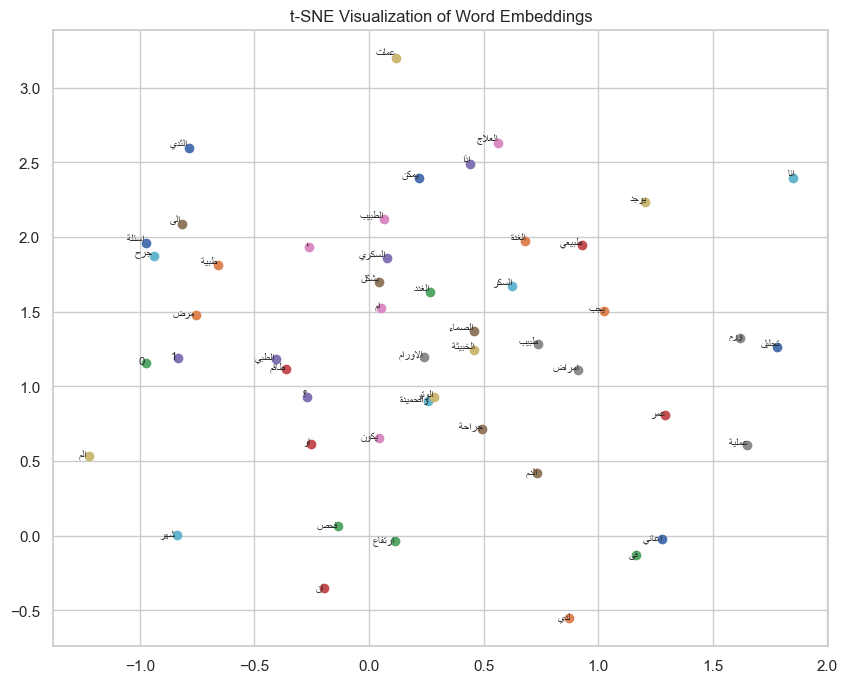

In [86]:
from sklearn.manifold import TSNE


def visualize_embeddings(embedding_matrix, tokenizer):
    words_to_visualize = list(tokenizer.word_index.keys())[:50]

    word_indices = [tokenizer.word_index[word] for word in words_to_visualize]

    # Extract the corresponding vectors
    subset_embedding_matrix = embedding_matrix[word_indices]

    # t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(subset_embedding_matrix)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words_to_visualize):
        
        reshaped_text = arabic_reshaper.reshape(word)
       
        bidi_text = get_display(reshaped_text)

        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
        
        plt.annotate(bidi_text, 
                     xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]),
                     bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='none'),
                     textcoords='offset points',
                     ha='right', va='center', fontsize=8)

    plt.title('t-SNE Visualization of Word Embeddings')
    plt.show()

# استدعاء الدالة مع مصفوفة التضمين ومفردات الرموز
visualize_embeddings(embedding_matrix, tokenizer)


## [6.5]

In [90]:
import numpy as np

def word_analogy(word1, word2, word3, embedding_matrix, words, top_k=5):
    # Calculate analogy: word1 - word2 + word3
    analogy_vector = embedding_matrix[words.index(word1)] - embedding_matrix[words.index(word2)] + embedding_matrix[words.index(word3)]

    # Find closest words
    distances = np.linalg.norm(embedding_matrix - analogy_vector, axis=1)
    closest_indices = np.argsort(distances)[:top_k]

    closest_words = [words[i] for i in closest_indices]
    return closest_words    

def apply_analogy_operations(word_pairs, embedding_matrix, words, top_k=5):
    for word1, word2, word3 in word_pairs:
        # Calculate analogy and get closest words
        analogy_result = word_analogy(word1, word2, word3, embedding_matrix, words, top_k)
        print(f"Analogy: {word1} is to {word2} as {word3} is to {analogy_result}")


word_pairs_to_test = [
    ('الطبيب', 'المريض', 'الطبي'),
    ('ضغط', 'ارتفاع', 'فحص'),
    ('الدم', 'السكر', 'تحليل'),
    ('طبيعي', 'الصماء', 'الغدد'),
    ('الحميدة', 'الخبيثة', 'الاورام')
]


apply_analogy_operations(word_pairs_to_test, embedding_matrix, list(tokenizer.word_index.keys()))


Analogy: الطبيب is to المريض as الطبي is to ['الطبيب', 'الطبي', 'وخزعه', 'يدي', 'أساسي']
Analogy: ضغط is to ارتفاع as فحص is to ['بالسكر', 'الدودية', 'السعال', 'الاستشاري', 'المحترم']
Analogy: الدم is to السكر as تحليل is to ['تحليل', 'بروز', 'مره', 'ماده', 'مؤخرا']
Analogy: طبيعي is to الصماء as الغدد is to ['الغدد', 'الام', 'واحيانا', 'طبيعي', 'شهور']
Analogy: الحميدة is to الخبيثة as الاورام is to ['الاورام', 'فيتامين', 'الحميدة', 'مدة', 'يجب']


# Question [7]: Deep Neural Network

## [7.1]

### [7.1.1] + [7.1.2]

In [115]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

def train_nn_with_features(x_train, y_train, x_test, y_test, features_type):
    if features_type == 'bag_of_words':
        vectorizer = CountVectorizer(binary=True)
    elif features_type == 'tf_idf':
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Invalid features_type. Supported values: 'bag_of_words', 'tf_idf'")

    x_train_features = vectorizer.fit_transform(x_train)
    x_test_features = vectorizer.transform(x_test)

    # Normalize input features
    scaler = StandardScaler()
    x_train_features = scaler.fit_transform(x_train_features.toarray())
    x_test_features = scaler.transform(x_test_features.toarray())

    # Train the neural network
    model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=50, random_state=42)

    for _ in tqdm(range(10), desc=f'Training Neural Network ({features_type})', unit='%'):
        model.fit(x_train_features, y_train)

    y_predict = model.predict(x_test_features)

    accuracy = accuracy_score(y_test, y_predict)
    balance_accuracy = balanced_accuracy_score(y_test, y_predict)

    return accuracy, balance_accuracy


# Train using Bag of Words
accuracy_bow, balance_accuracy_bow = train_nn_with_features(x_train_cleaned_best[:2000], y_train[:2000], x_test_cleaned_best[:2000], y_test[:2000], 'bag_of_words')
# Train using TF-IDF
accuracy_tfidf, balance_accuracy_tfidf = train_nn_with_features(x_train_cleaned_best[:2000], y_train[:2000], x_test_cleaned_best[:2000], y_test[:2000], 'tf_idf')


Training Neural Network (bag_of_words):   0%|          | 0/10 [00:00<?, ?%/s]c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
Training Neural Network (bag_of_words):  10%|█         | 1/10 [00:40<06:06, 40.76s/%]c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
Training Neural Network (bag_of_words):  20%|██        | 2/10 [01:20<05:21, 40.23s/%]c:\Users\Alaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converge

In [116]:
print(f'accuracy_bow: {accuracy_bow}')
print(f'balance_accuracy_bow: {balance_accuracy_bow}')
print(f'accuracy_tfidf: {accuracy_tfidf}')
print(f'balance_accuracy_tfidf: {balance_accuracy_tfidf}')

accuracy_bow: 0.1475
balance_accuracy_bow: 0.14137616397312872
accuracy_tfidf: 0.1365
balance_accuracy_tfidf: 0.1335983663983924


In [117]:
import pandas as pd

# Assuming 'comparison_table1.csv' exists
comparison_table = pd.read_csv('comparison_table1.csv')

# Append results for 'bag_of_words' model
comparison_table = comparison_table.append({
    'question_step_number': "7.1",
    'model_name': 'fully_connected',
    'features': 'bag_of_words',
    'model_parameters': 'default',
    'preprocessing_methods': "MLPClassifier",
    'accuracy': accuracy_bow,
    'balance_accuracy': balance_accuracy_bow
}, ignore_index=True)

# Append results for 'tf_idf' model
comparison_table = comparison_table.append({
    'question_step_number': "7.1",
    'model_name': 'fully_connected',
    'features': 'tf_idf',
    'model_parameters': 'default',
    'preprocessing_methods': "MLPClassifier",
    'accuracy': accuracy_tfidf,
    'balance_accuracy': balance_accuracy_tfidf
}, ignore_index=True)

# Print the updated comparison_table
comparison_table

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,3.5,logistic_regression,bag of words,default,non,0.648467,0.630742
1,3.5,logistic_regression,bag of words,default,remove_urls,0.582787,0.563094
2,3.5,logistic_regression,bag of words,default,remove_doctor_names_and_remove_specialty,0.657419,0.641764
3,3.5,logistic_regression,bag of words,default,remove_repeated_letters,0.652898,0.634507
4,3.5,logistic_regression,bag of words,default,arabic_to_indian_numbers,0.651835,0.634684
5,3.5,logistic_regression,bag of words,default,replace_numbers_with_symbol,0.651658,0.634175
6,3.5,logistic_regression,bag of words,default,delete_all_numbers,0.651037,0.632508
7,3.5,logistic_regression,bag of words,default,delete_date_time,0.652101,0.634445
8,3.5,logistic_regression,bag of words,default,delete_marks_punct,0.598653,0.576922
9,3.5,logistic_regression,bag of words,default,keep_arabic_numbers_punctuation,0.659103,0.643616


## [7.2]

In [177]:
x_train_sequences = [len(sequence.split()) for sequence in x_train_cleaned_best]

# Find the maximum sequence length
max_sequence_length = max(x_train_sequences)

print(f"Maximum Sequence Length: {max_sequence_length}")

Maximum Sequence Length: 1333


### [7.2.1] + [7.2.2] + [7.2.3]

In [ ]:

from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# تحديد الأساليب المختلفة لتهيئة الطبقة embedding
embedding_methods = ['frozen', 'trainable', 'random', 'pretrained']


def train_cnn_with_embedding(x_train, y_train, x_test, y_test, embedding_method, embedding_matrix=None):
    # تحويل النصوص إلى تمثيل مناسب (في هذا الحالة Bag of Words)
    vectorizer = CountVectorizer(binary=True)
    x_train_features = vectorizer.fit_transform(x_train)
    x_test_features = vectorizer.transform(x_test)
    

    # بناء الشبكة العصبونية العميقة باستخدام Convolutional Neural Network
    model = Sequential()
    
    # إضافة طبقة embedding بحسب الطريقة المطلوبة
    if embedding_method == 'frozen':
        model.add(Embedding(input_dim=x_train_features.shape[1], output_dim=22, input_length=x_train_features.shape[1], weights=[embedding_matrix], trainable=False))
    elif embedding_method == 'trainable':
        model.add(Embedding(input_dim=x_train_features.shape[1], output_dim=22, input_length=x_train_features.shape[1], weights=[embedding_matrix], trainable=True))
    elif embedding_method == 'random':
        model.add(Embedding(input_dim=x_train_features.shape[1], output_dim=22, input_length=x_train_features.shape[1]))

    
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # تدريب الشبكة
    model.fit(x_train_features, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

    # التنبؤ
    y_predict = model.predict(x_test_features)
    y_predict = (y_predict > 0.5).astype(int)

    # حساب الدقة ودقة التوازن
    accuracy = accuracy_score(y_test, y_predict)
    balance_accuracy = balanced_accuracy_score(y_test, y_predict)

    return accuracy, balance_accuracy


# تدريب باستخدام طبقة embedding مجمدة
accuracy_frozen, balance_accuracy_frozen = train_cnn_with_embedding(x_train_cleaned_best[:100], y_train[:100], x_test_cleaned_best[:100], y_test[:100], 'frozen', embedding_matrix=embedding_matrix)

# تدريب باستخدام طبقة embedding قابلة للتعديل
accuracy_trainable, balance_accuracy_trainable = train_cnn_with_embedding(x_train_cleaned_best[:100], y_train[:100], x_test_cleaned_best[:100], y_test[:100], 'trainable', embedding_matrix=embedding_matrix)

# تدريب باستخدام طبقة embedding عشوائية
accuracy_random, balance_accuracy_random = train_cnn_with_embedding(x_train_cleaned_best[:100], y_train[:100], x_test_cleaned_best[:100], y_test[:100], 'random')


### [7.2.2]

### [7.2.3]

### [7.2.4]

## [7.3]

## Extra [7.4]

# Final Results

In [185]:
df = pd.DataFrame(comparison_table)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,3.5,logistic_regression,bag of words,default,non,0.648467,0.630742
1,3.5,logistic_regression,bag of words,default,remove_urls,0.582787,0.563094
2,3.5,logistic_regression,bag of words,default,remove_doctor_names_and_remove_specialty,0.657419,0.641764
3,3.5,logistic_regression,bag of words,default,remove_repeated_letters,0.652898,0.634507
4,3.5,logistic_regression,bag of words,default,arabic_to_indian_numbers,0.651835,0.634684
5,3.5,logistic_regression,bag of words,default,replace_numbers_with_symbol,0.651658,0.634175
6,3.5,logistic_regression,bag of words,default,delete_all_numbers,0.651037,0.632508
7,3.5,logistic_regression,bag of words,default,delete_date_time,0.652101,0.634445
8,3.5,logistic_regression,bag of words,default,delete_marks_punct,0.598653,0.576922
9,3.5,logistic_regression,bag of words,default,keep_arabic_numbers_punctuation,0.659103,0.643616


In [186]:
df.to_csv("[alaa + ola + reda].csv", index=False)